# Waffle Charts, Word Clouds, and Regression Plots

### Objectives

- Create Word cloud and Waffle charts
- Create regression plots with Seaborn library

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

from PIL import Image
!pip install wordcloud
import seaborn as sns
import wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df = pd.read_csv(url)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.set_index('Country', inplace = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Waffle Charts

A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

Let's revisit the previous case study about Denmark, Norway, and Sweden, from the previous data visualization projects.

In [5]:
df_dsn = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.



In [7]:
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total']/total_values

pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [9]:
# Step 2. The second step is defining the overall size of the waffle chart.
width = 40 #width of the chart
length = 10 #length of the chart

total_num_titles = width * length
print(f'Total no of titles is {total_num_titles}.')


Total no of titles is 400.


In [11]:
#Step 3. The third step is using the proportion of each category to determe it respective number of tiles
tiles_per_category = (category_proportions * total_num_titles). round().astype(int)
pd.DataFrame({'No of Titles': tiles_per_category})

,No of Titles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the waffle chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [16]:
#intialize the waffle chart as an empty matrix
waffle_chart = np.zeros((width, length), dtype = np.uint)

#define indicies to loop through wafflee chart
category_index = 0
tile_index = 0

#populate the waffle chart
for col in range (width):
    for row in range(length):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            waffle_chart [col, row] = category_index

print('Waffle chart populated!')
            

Waffle chart populated!


In [17]:
#let's take a peek at how the matrix looks like
waffle_chart

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

<Figure size 640x480 with 0 Axes>

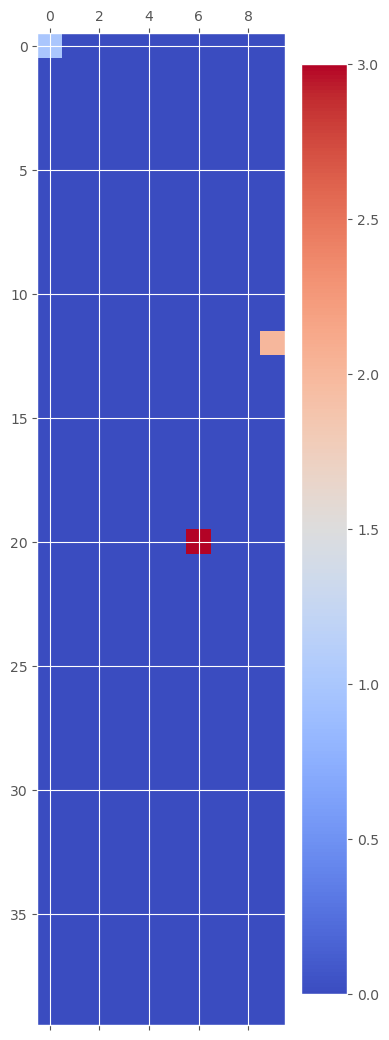

In [20]:
#step 5 - map the waffle chart matrix into a visual
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

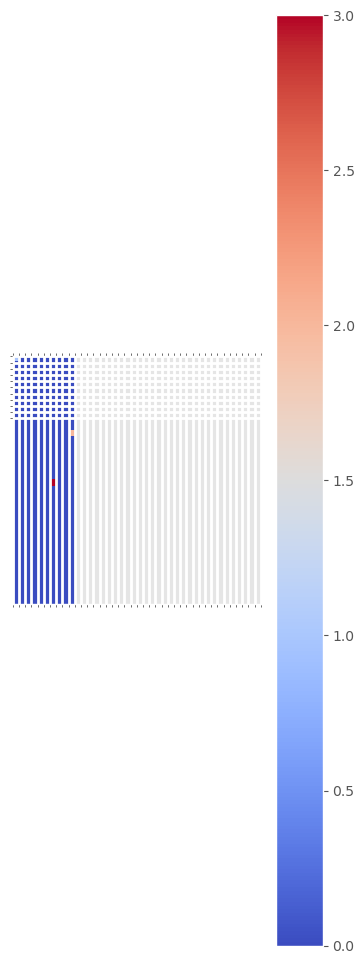

In [23]:
#step 6 - prettify the chart
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (length),1), minor=True)
ax.grid(which = 'minor', color='w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\ABID\AppData\Local\Temp\ipykernel_16144\3734212376.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + '(' + str(df_dsn['Total'][i]) + ')'  # Fixed syntax
C:\Users\ABID\AppData\Local\Temp\ipykernel_16144\3734212376.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i]) / total_values)


<Figure size 640x480 with 0 Axes>

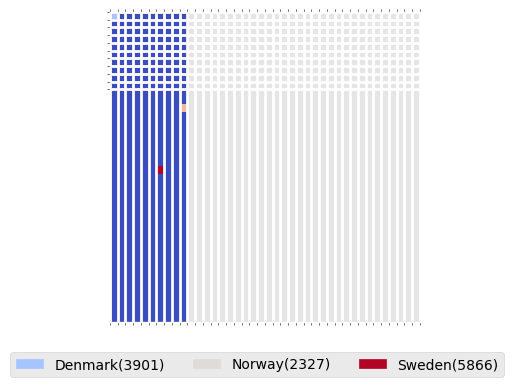

In [27]:
#step 7 create legend and add it to the chart 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig = plt.figure()
colormap = plt.cm.coolwarm

# Plot waffle chart
plt.matshow(waffle_chart, cmap=colormap)

ax = plt.gca()
ax.set_xticks(np.arange(-.5, width, 1), minor=True)
ax.set_yticks(np.arange(-.5, length, 1), minor=True)  # Fixed 'length' issue

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

values_cumsum = df_dsn['Total'].cumsum()
# Create legend handles
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + '(' + str(df_dsn['Total'][i]) + ')'  # Fixed syntax
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# Add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1))

plt.show()


Now it would very inefficient to repeat these seven steps every time we wish to create a waffle chart. So let's combine all seven steps into one function called create_waffle_chart. This function would take the following parameters as input:

1. categories: Unique categories or classes in dataframe.
2. values: Values corresponding to categories or classes.
3. height: Defined height of waffle chart.
4. width: Defined width of waffle chart.
5. colormap: Colormap class
6. value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [28]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()
    
    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()



Now to create a waffle chart, all we have to do is call the function create_waffle_chart. Let's define the input parameters:

In [30]:
width = 40
height = 10

categories = df_dsn.index.values
value = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


C:\Users\ABID\AppData\Local\Temp\ipykernel_16144\1890184673.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\ABID\AppData\Local\Temp\ipykernel_16144\1890184673.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
C:\Users\ABID\AppData\Local\Temp\ipykernel_16144\1890184673.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

<Figure size 640x480 with 0 Axes>

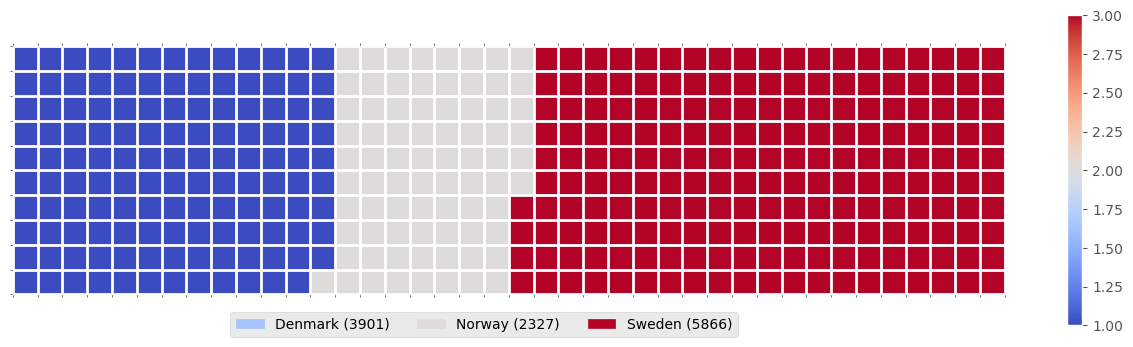

In [32]:
create_waffle_chart(categories, value, height, width, colormap)

There seems to be a new Python package for generating waffle charts called PyWaffle,

Let's create the same waffle chart with pywaffle now

In [33]:
!pip install pywaffle

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
    --------------------------------------- 0.5/25.6 MB 3.4 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/25.6 MB 3.2 MB/s eta 0:00:08
   --- ------------------------------------ 2.4/25.6 MB 4.5 MB/s eta 0:00:06
   ----- ---------------------------------- 3.4/25.6 MB 4.2 MB/s eta 0:00:06
   ------ --------------------------------- 3.9/25.6 MB 4.4 MB/s eta 0:00:05
   ------ --------------------------------- 4.5/25.6 MB 4.0 MB/s eta 0:00:06
   ------ --------------------------------- 4.5/25.6 MB 4.0 MB/s eta 0:00:06
   ------- -------------------------------- 4.7/25.6 MB 2.7 MB/s eta 0:00:08
   -------- ------------------------------- 5.8/25.6 MB 3.0 MB/s eta 0:00:07
   ------------ --------------------------- 7.9/25.6 MB 3.7 MB/s eta 0:00:05
   -------------- ------------------------- 9.4/25.6 MB 4.1 MB/s eta 0:00:05
   --

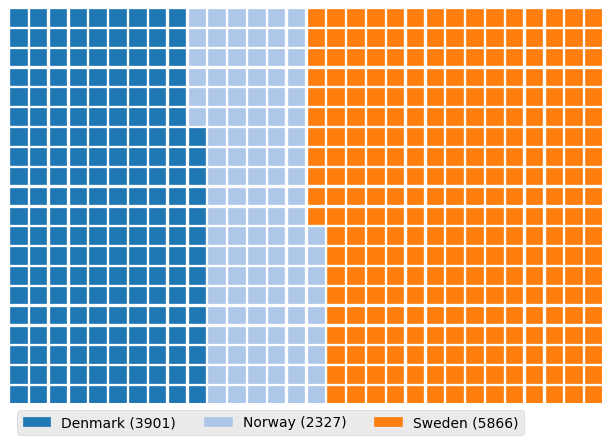

In [35]:
from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle, 
                 rows = 20, columns = 30,
                 values = df_dsn['Total'],
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f'{k} ({v})' for k, v in zip(df_dsn.index.values, df_dsn.Total)],
                           'loc': 'lower left', 'bbox_to_anchor':(0,-0.1), 'ncol':3}
                )
plt.show()

## Word Cloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating word clouds. The package, called word_cloud was developed by Andreas Mueller.

Let's use this package to learn how to generate a word cloud for a given text document.

In [36]:
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud imported!')

Wordcloud imported!


Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [39]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode('utf-8')

Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [40]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [41]:
alice_wc = WordCloud()

alice_wc.generate(alice_novel)

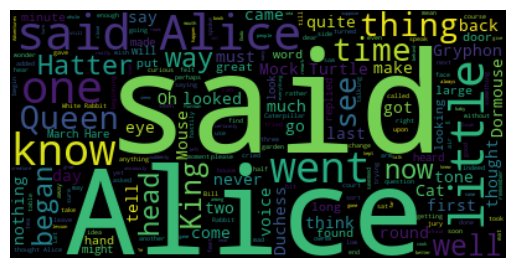

In [42]:
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

nteresting! So in the first 2000 words in the novel, the most common words are Alice, said, little, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

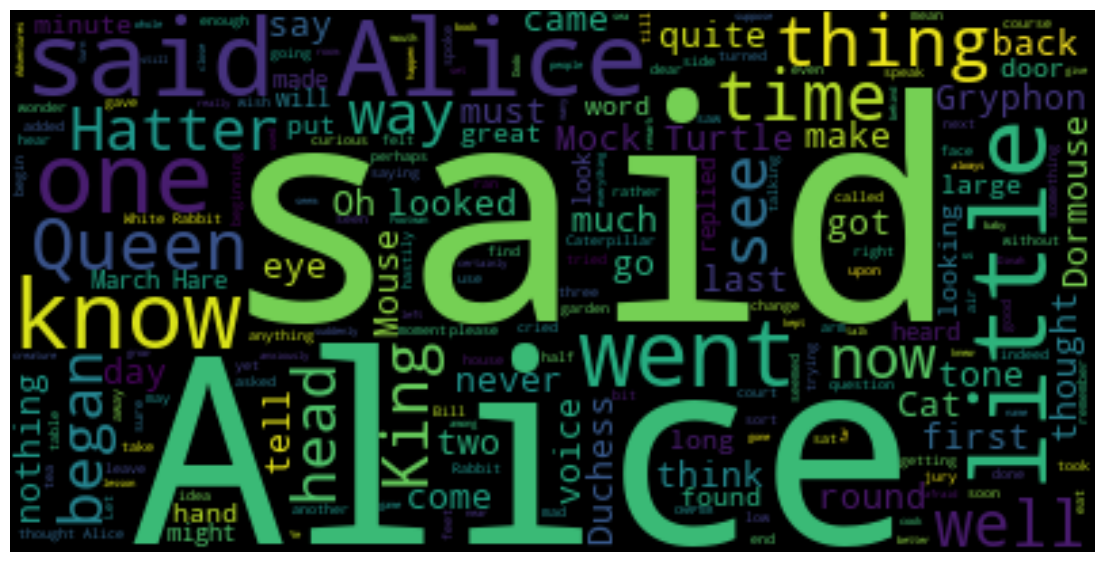

In [43]:
fig = plt.figure(figsize = (14,18))
plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

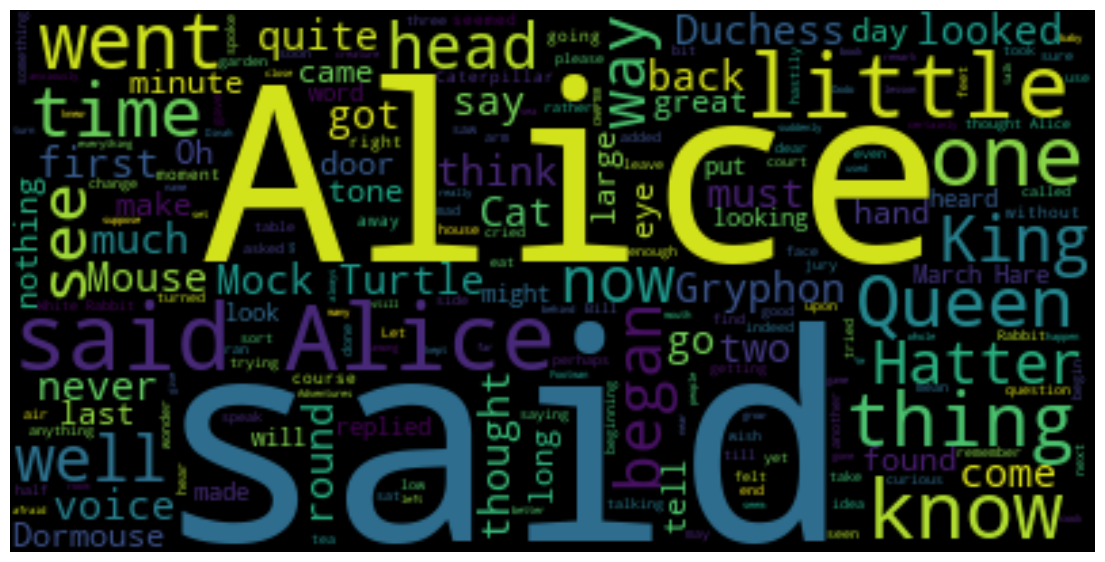

In [44]:
stopwords.add('said') #add the words said to stopwords

#re-generate the word count
alice_wc.generate(alice_novel)

fig = plt.figure(figsize = (14,18))

plt.imshow(alice_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it alice_mask.png.

In [45]:
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

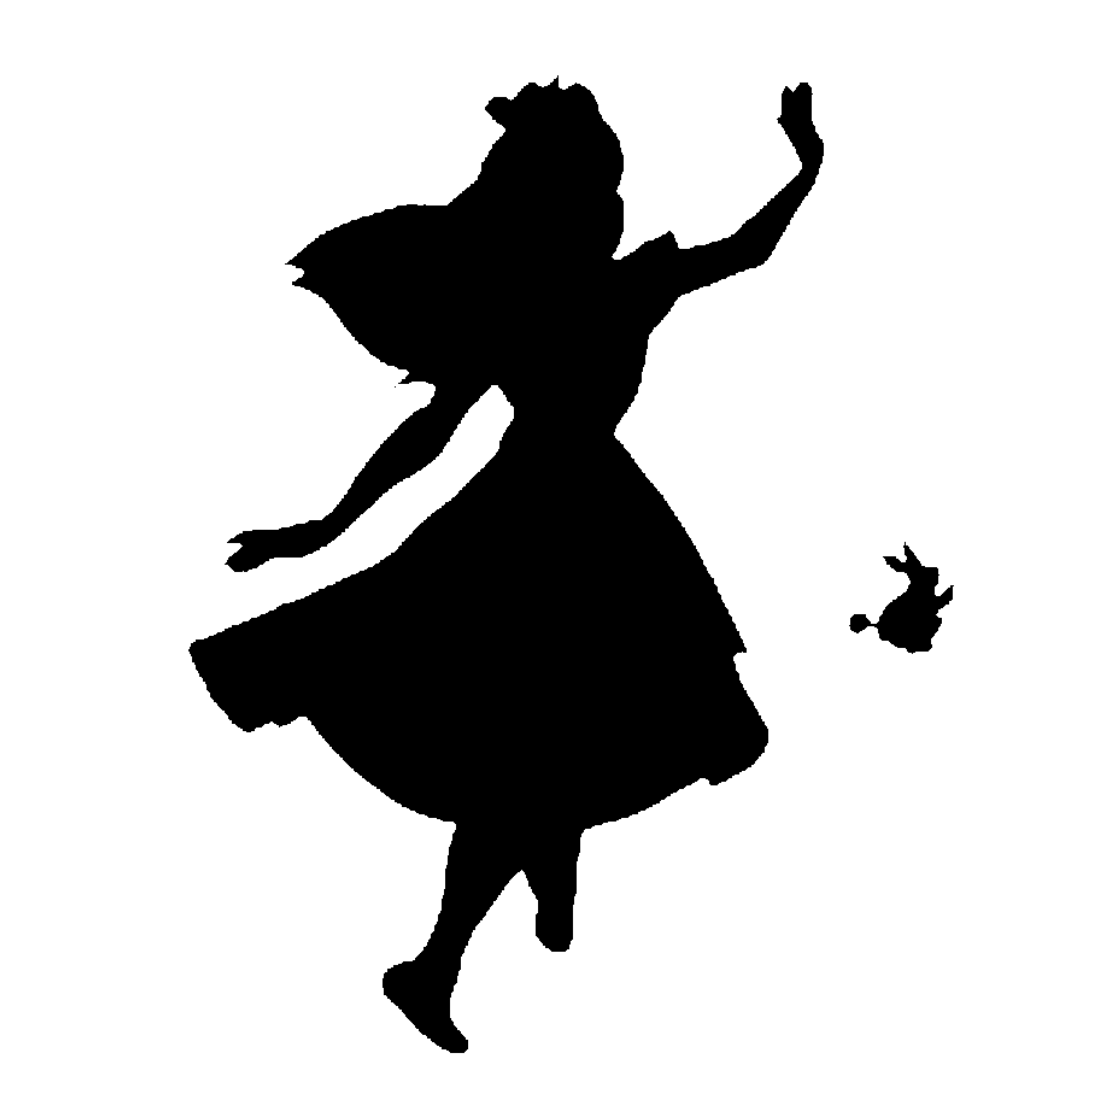

In [46]:
#let's take a look at hoe the mask look like
fig = plt.figure(figsize = (14,18))

plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

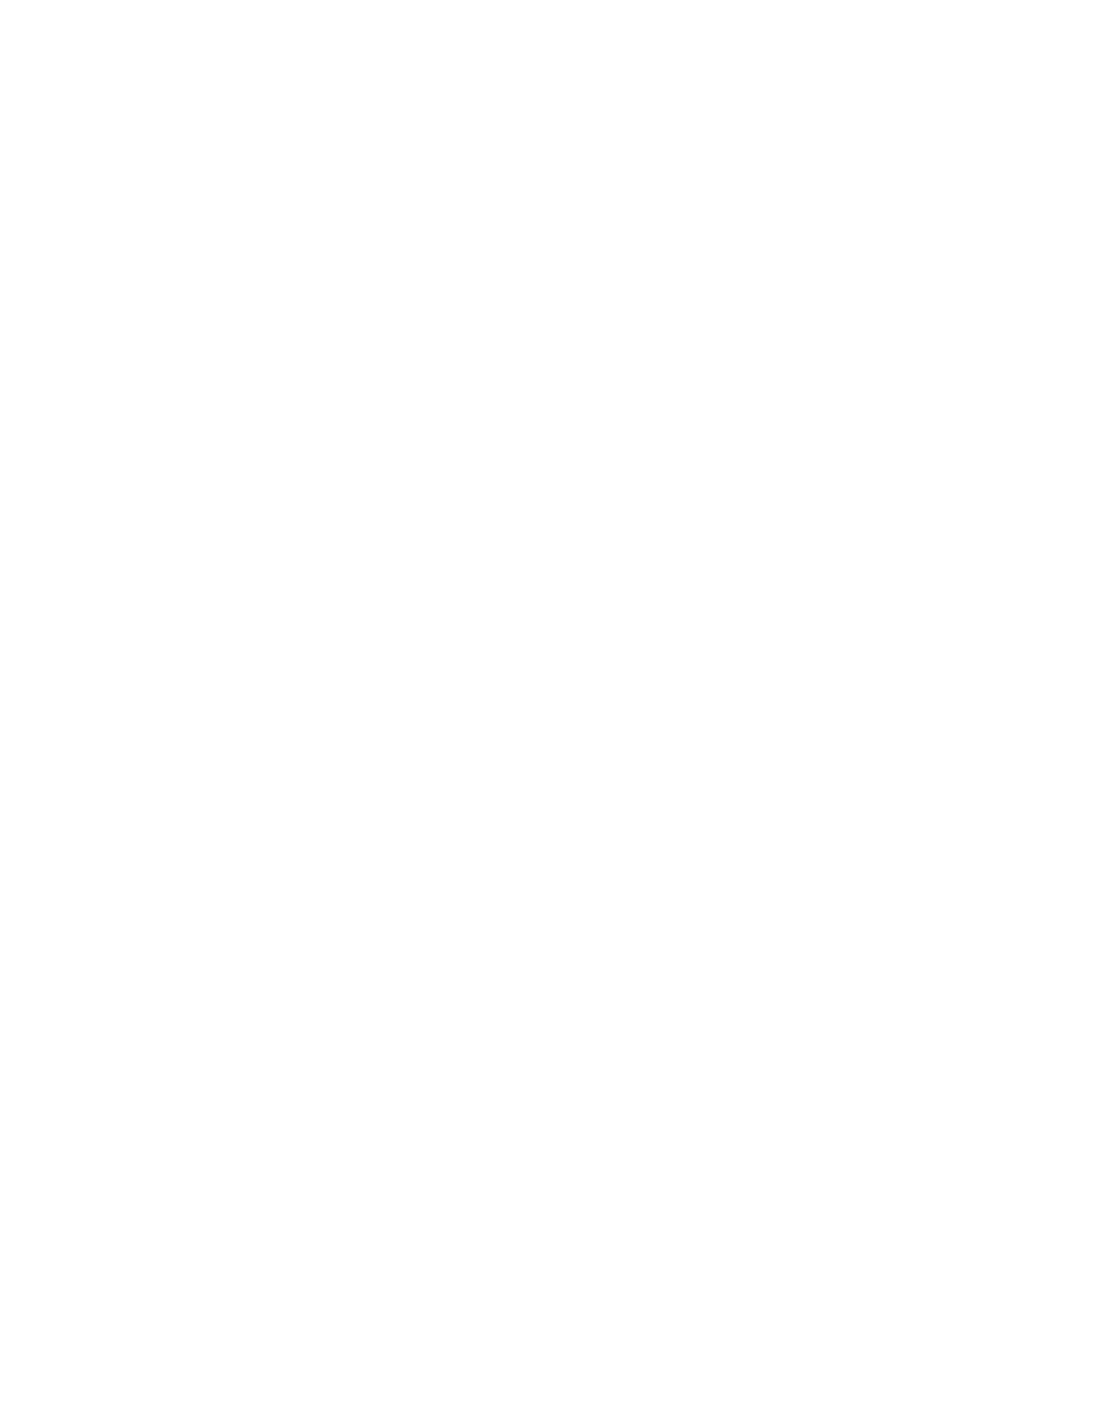

In [49]:
alice_wc = WordCloud(background_color = 'white', max_words = 2000, mask = alice_mask, stopwords = stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure(figsize = (14,18))
plt.axis('off')
plt.show()

## Plotting with Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In lab Pie Charts, Box Plots, Scatter Plots, and Bubble Plots, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore seaborn and see how efficient it is to create regression lines and fits using this library!

In [51]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

Countplot - 
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. Let's find the count of Continents in the data 'df_can' using countplot on 'Continent'

<Axes: xlabel='Continent', ylabel='count'>

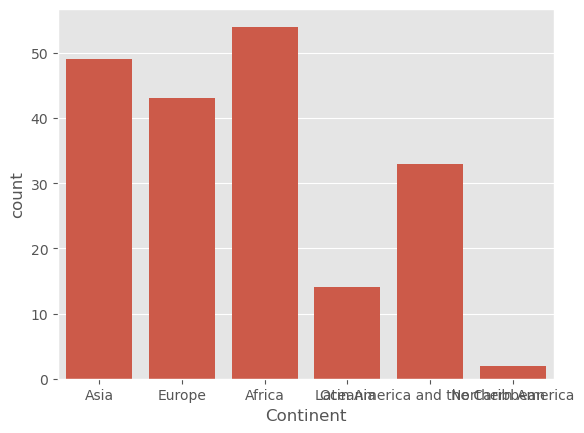

In [52]:
sns.countplot(x ='Continent', data = df)

The labels on the x-axis doesnot look as expected.
Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America",
and change the figure size and then display the plot again

In [54]:
df1 = df.replace({'Latin America and the Caribbean' : 'LA', 'Northern America' : 'NA'})

<Axes: xlabel='Continent', ylabel='count'>

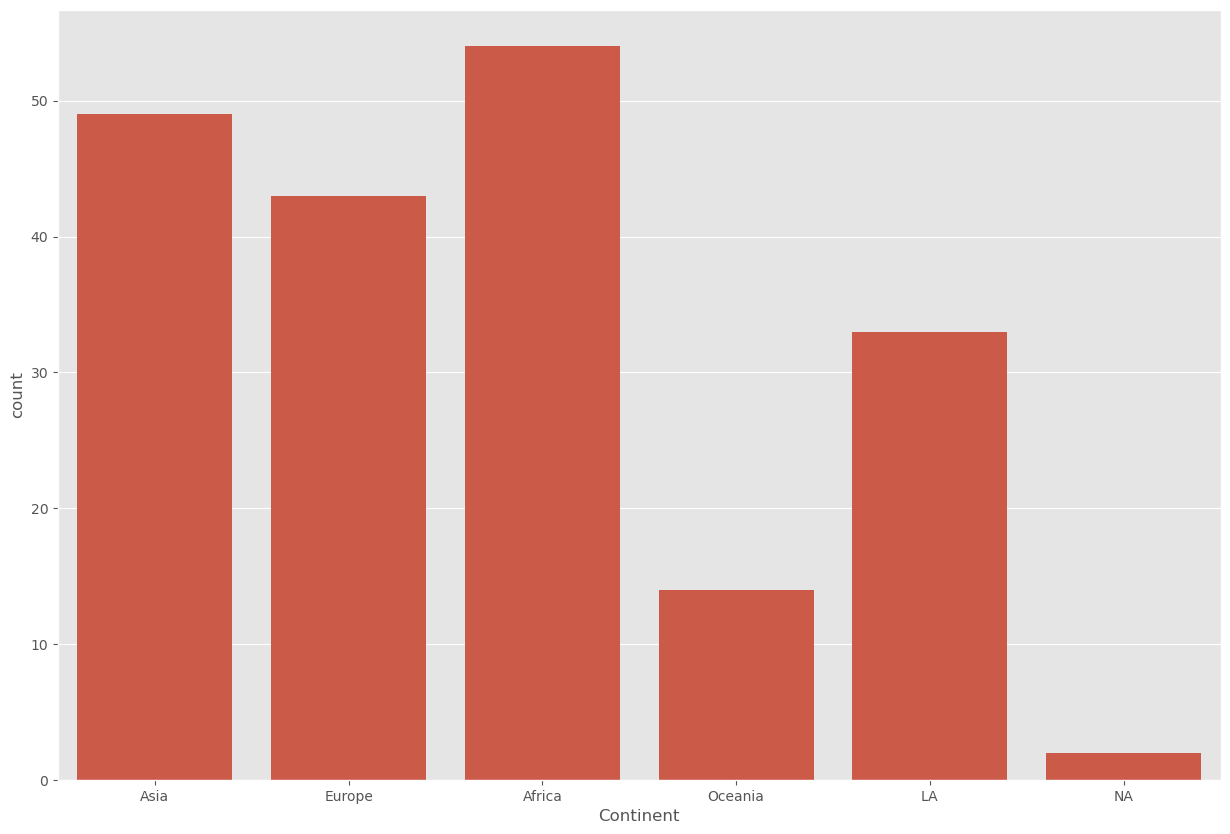

In [58]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Continent', data = df1)

## BarPlot

This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals.
Let's plot the total immigrants Continent-wise

<Axes: xlabel='Continent', ylabel='Total'>

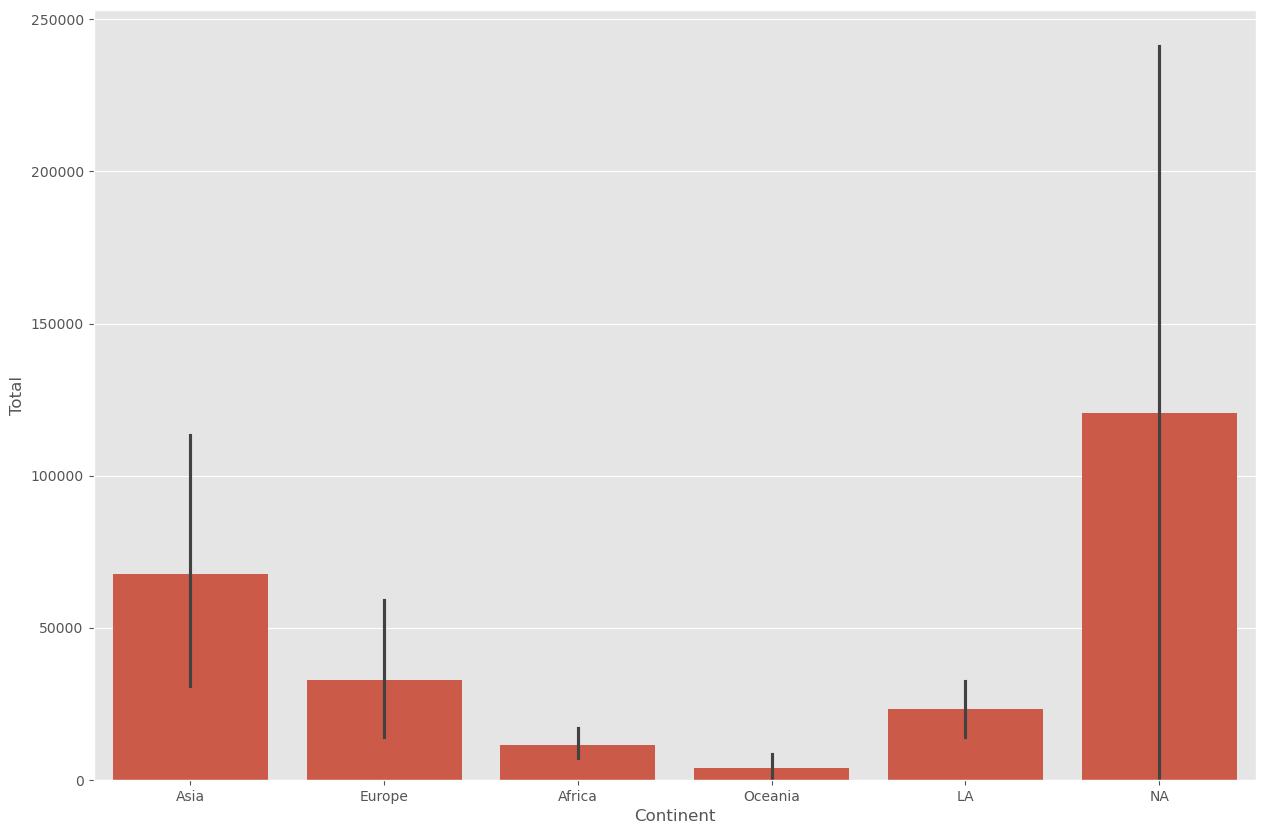

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Continent', y = 'Total', data = df1)

We can verify the values by performing the groupby on the total and continent for mean()

In [60]:
df2 = df1.groupby('Continent')['Total'].mean()
df2

Continent
Africa      11462.000000
Asia        67710.081633
Europe      32812.720930
LA          23186.303030
NA         120571.000000
Oceania      3941.000000
Name: Total, dtype: float64

## Regession plot

With seaborn, generating a regression plot is as simple as calling the regplot function.

In [62]:
years = list(map(str, range(1980, 2014)))
df_tot = pd.DataFrame(df[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

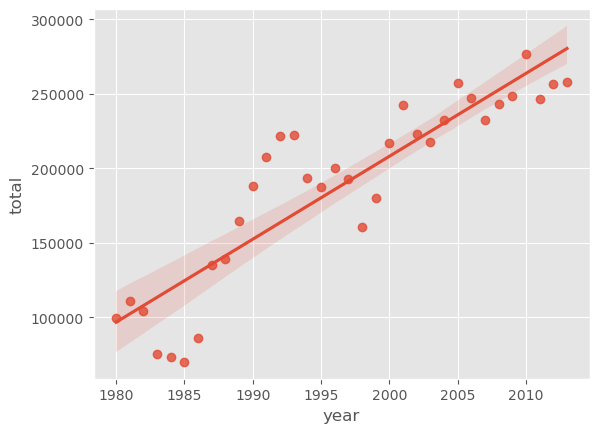

In [63]:
sns.regplot(x = 'year', y = 'total', data = df_tot)

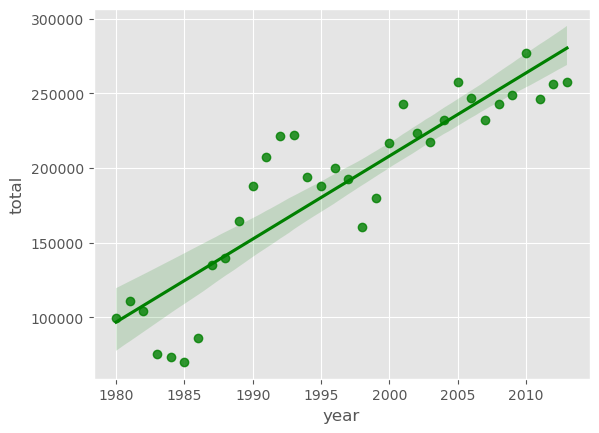

In [64]:
#to customize the color of the scatterplot and the regression line
sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green')
plt.show()

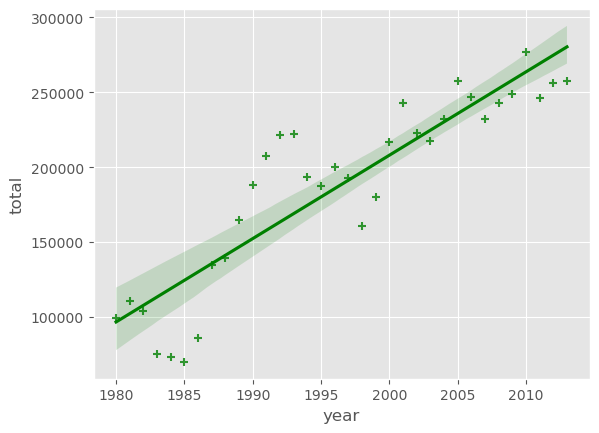

In [65]:
ax = sns.regplot(x='year', y='total', data = df_tot, color = 'green', marker = '+')
plt.show()

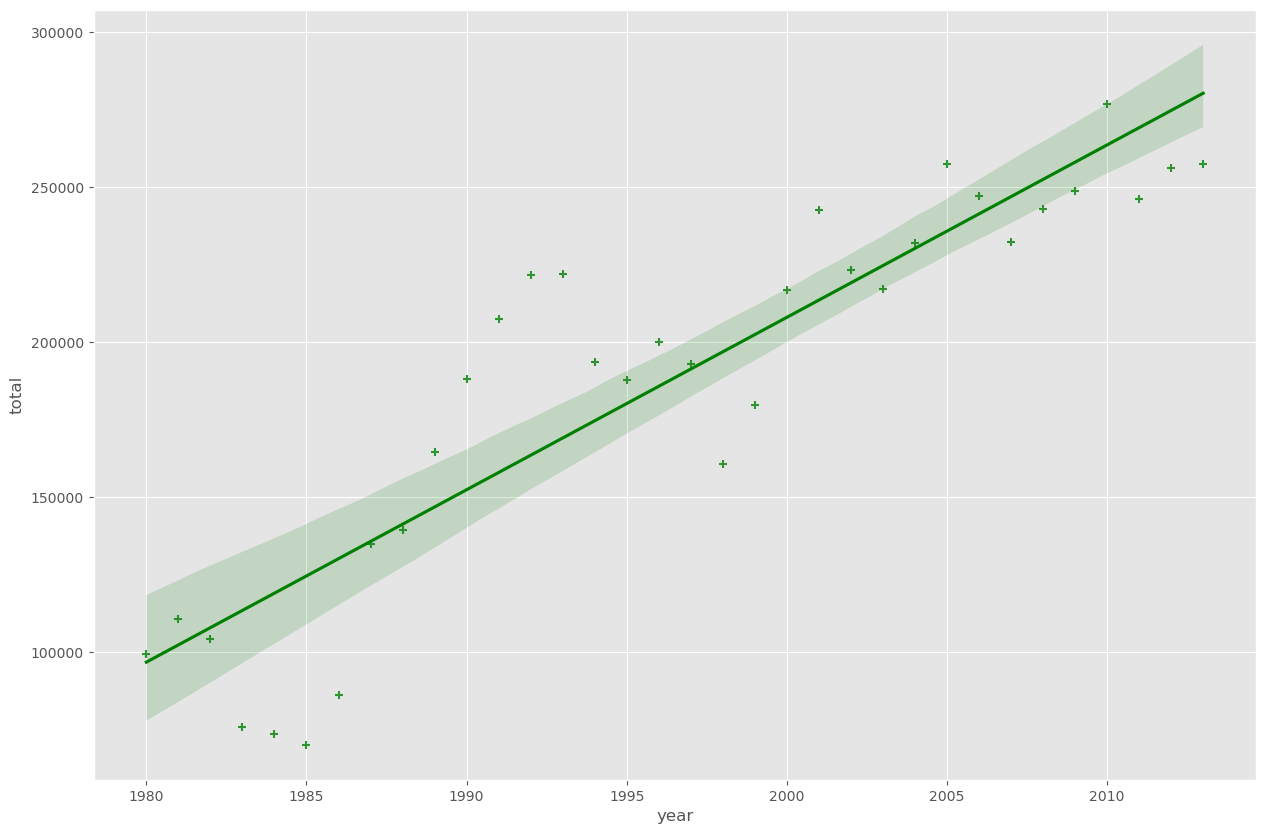

In [66]:
#let's blow up the plot a little so that it is more appelaing to the sight.
plt.figure(figsize=(15,10))
sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green', marker = '+')
plt.show()

And let's increase the size of the markers so they match the new size of figure, and add a title and x- and y - labels

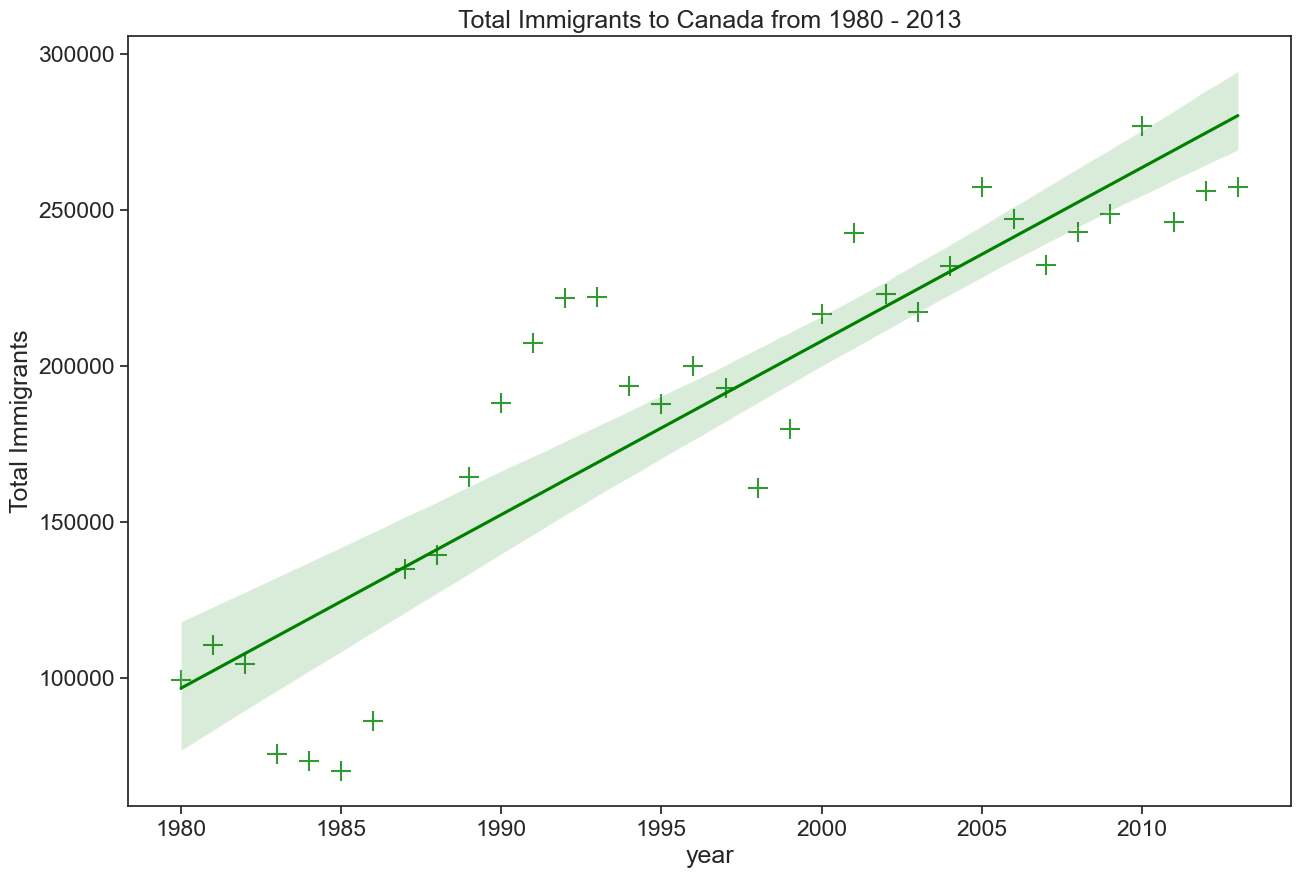

In [71]:
plt.figure(figsize = (15, 10))
ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green', marker = '+', scatter_kws = {'s':200})
ax.set(xlabel = 'year', ylabel = 'Total Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 - 2013')
plt.show()

Amazing! A complete scatter plot with a regression fit with 5 lines of code only. Isn't this really amazing?

If you are not a big fan of the purple background, you can easily change the style to a white plain background.

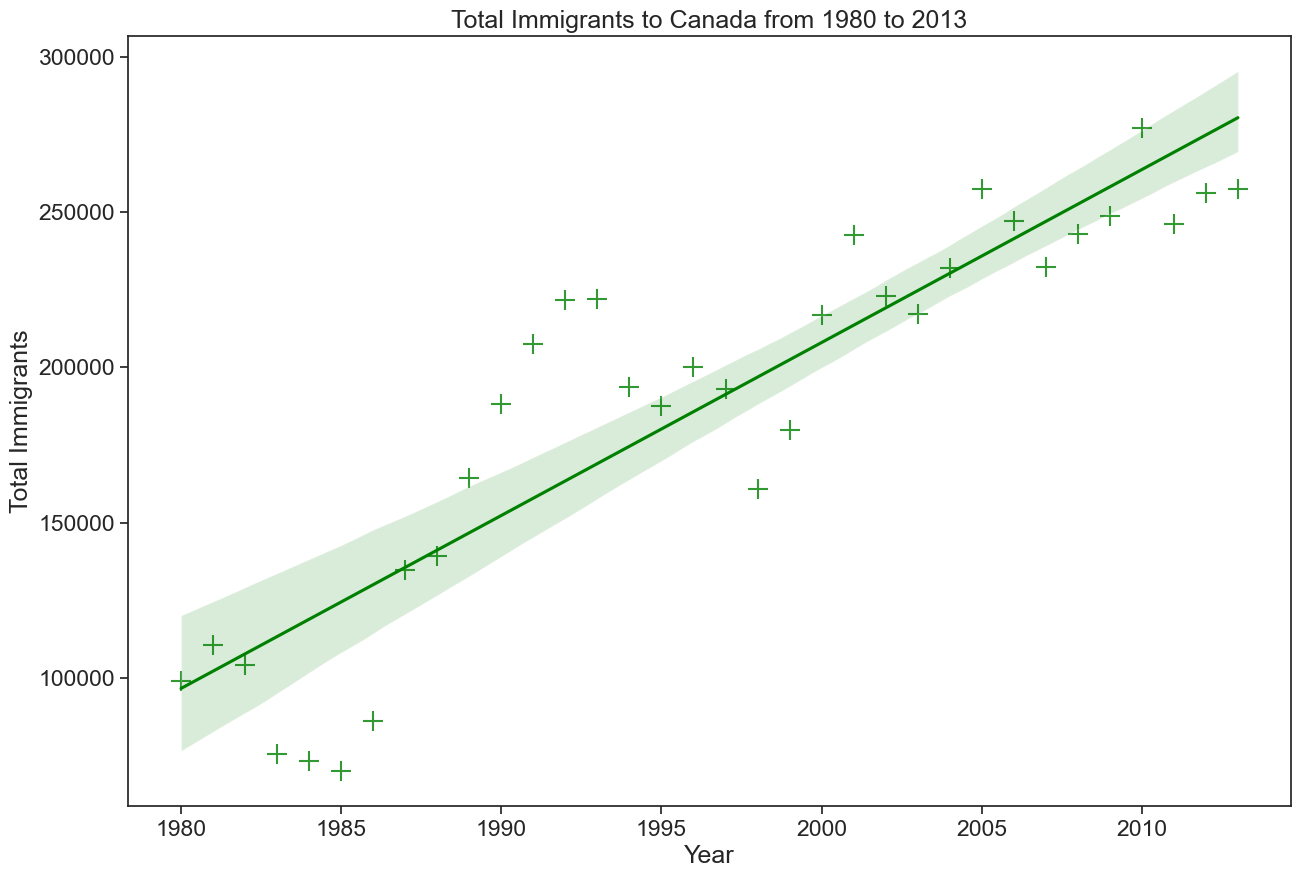

In [72]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
sns.set_style('ticks')  #change background to white background

ax = sns.regplot(x = 'year', y= 'total', data = df_tot, color = 'green', marker = '+', scatter_kws = {'s':200})
ax.set_xlabel('Year')
ax.set_ylabel('Total Immigrants')
ax.set_title('Total Immigrants to Canada from 1980 to 2013')

plt.show()

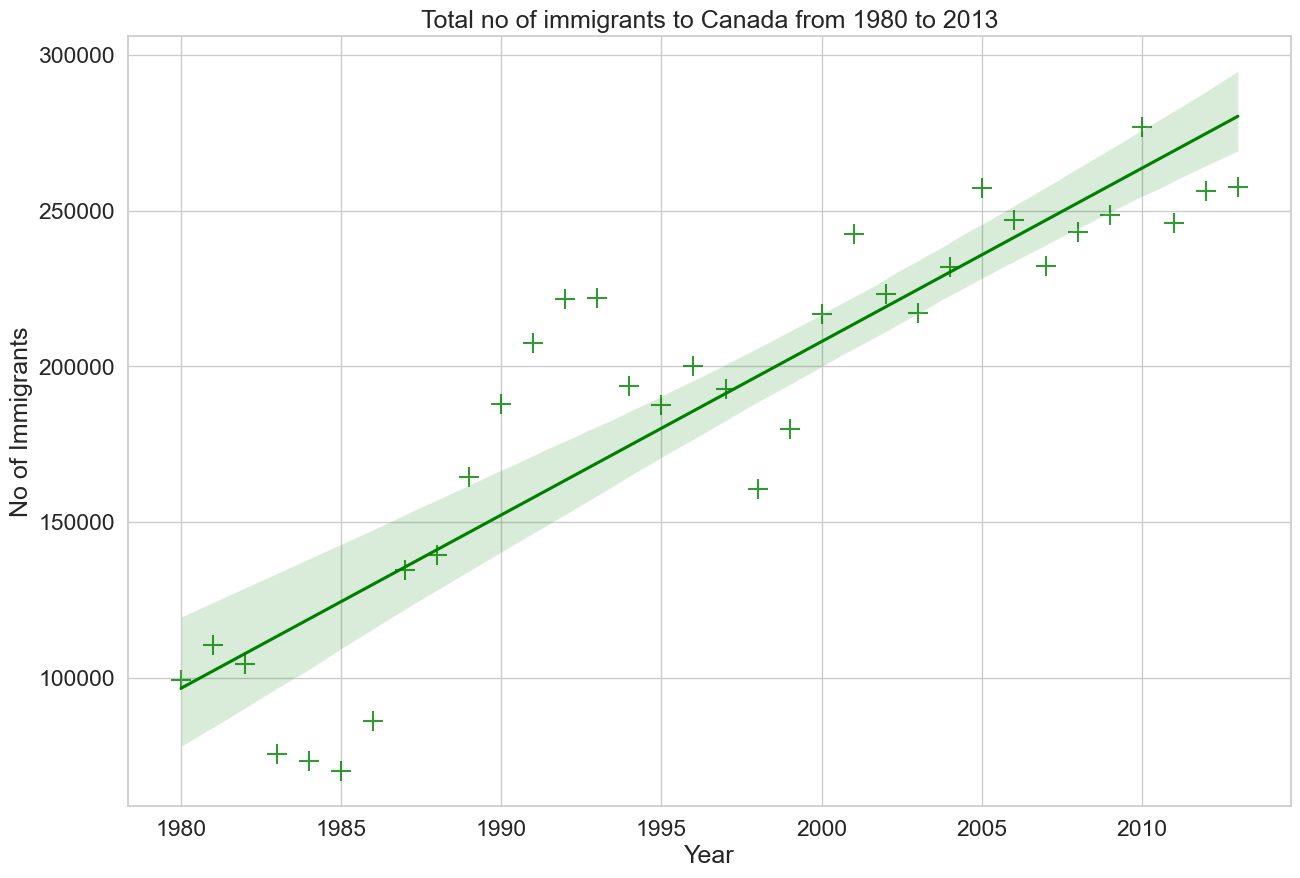

In [76]:
#white background with grids
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x = 'year', y = 'total', data = df_tot, color = 'green', marker = '+', scatter_kws = {'s': 200})
ax.set_xlabel('Year')
ax.set_ylabel('No of Immigrants')
ax.set_title('Total no of immigrants to Canada from 1980 to 2013')

plt.show()

Question - Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013.

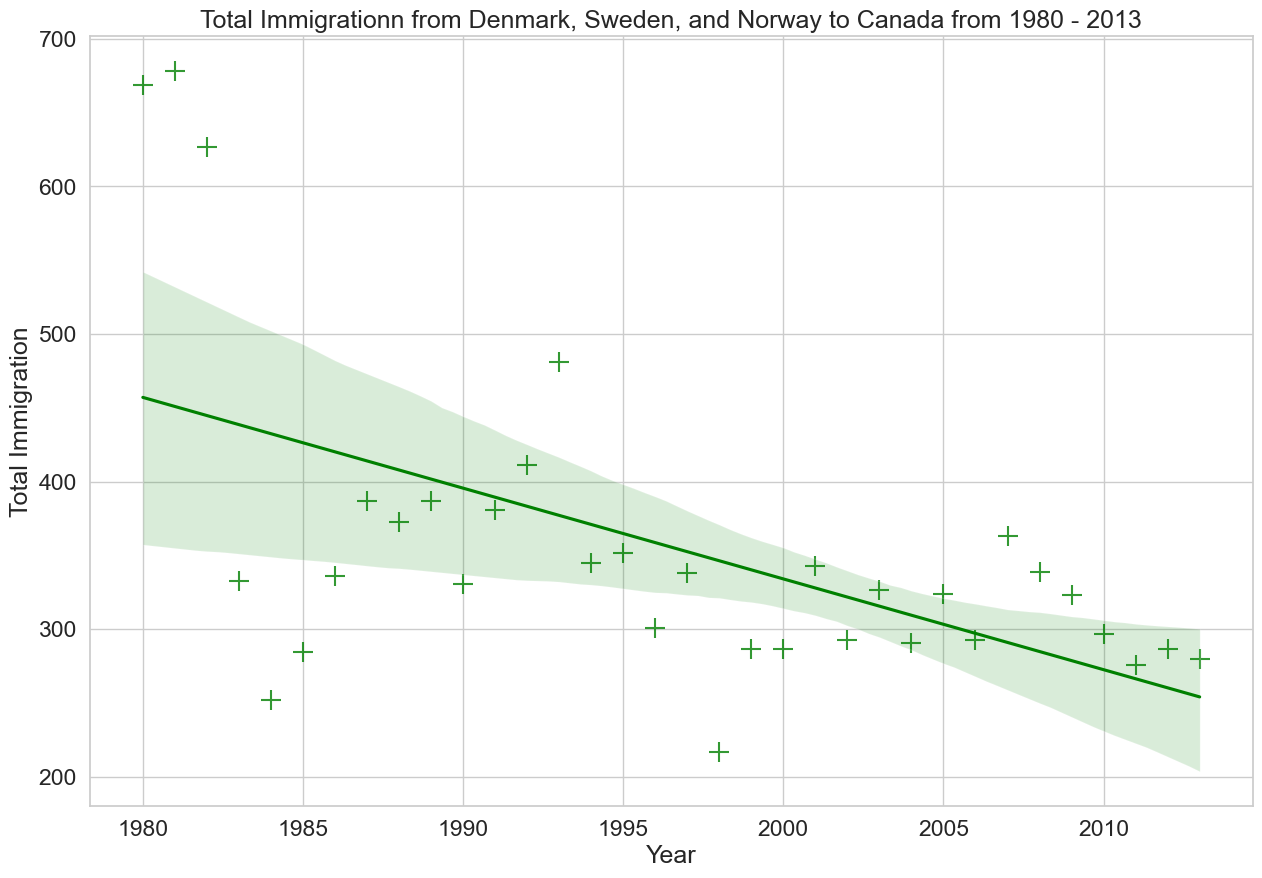

In [79]:
# create df_countries dataframe
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
df_total.reset_index(inplace=True)

    # rename columns
df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

    # define figure size
plt.figure(figsize=(15, 10))

    # define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

    # generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

plt.show()